In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [2]:
df = pd.read_excel(r"data\Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


 ## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.duplicated().sum()

220

In [7]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [12]:
# Droping the missing values since only two missing values is there
df.dropna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Airlines having duplicate names

In [13]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
df['Airline'] =df['Airline'].str.replace("Vistara Premium economy", "Vistara")
df['Airline'] =df['Airline'].str.replace("Jet Airways Business", "Jet Airways")
df['Airline'] =df['Airline'].str.replace("Multiple carriers Premium economy", "Multiple carriers")

In Additional_Info No info is repeated 

In [15]:
df['Additional_Info'].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [16]:
df['Additional_Info'] = df['Additional_Info'].str.replace("No Info","No info")

In [17]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time

In [18]:
# Cleaning and formatting Arrival time
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x[:5])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.time

In [19]:
# To convert duration to minutes
def duration_to_minutes(duration : str) ->int:
    parts = duration.split(' ')
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60  # Convert hours to minutes
        elif 'm' in part:
            total_minutes += int(part[:-1])      # Add remaining minutes
    return total_minutes


df['Duration'] = df['Duration'].apply(duration_to_minutes)

In [20]:
# Converting the Total Stops to int
df['Total_Stops'] = df['Total_Stops'].str.extract('(\d+)').astype(float)
df.fillna(0,inplace=True)

In [21]:
# Replacing Bombay with Mumbai
df['Route'] = df['Route'].str.replace('BOM', 'MUM')

## Feature Generation

In [22]:
# Formating the date to extract day, month, and year
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extracting day, month, and year components
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

# Extraction weekdays
df['Weekdays'] = pd.Series(df['Date_of_Journey']).dt.day_name()

In [23]:
def categorize_time(time):
    if time.hour >= 6 and time.hour < 12:
        return 'Morning'
    elif time.hour >= 12 and time.hour < 18:
        return 'Afternoon'
    elif time.hour >=18 and time.hour < 21:
        return 'Evening'
    else:
        return 'Night'


df['Time_Of_The_Day'] = df['Dep_Time'].apply(categorize_time)

In [24]:
df.describe()

,Duration,Total_Stops,Price,Day,Month,Year
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.00000,10463.0
mean,629.857116,0.802256,9026.642454,13.462487,4.70152,2019.0
std,500.734713,0.660624,4624.653227,8.467403,1.16375,0.0
min,5.000000,0.000000,1759.000000,1.000000,3.00000,2019.0
25%,170.000000,0.000000,5224.000000,6.000000,3.00000,2019.0
50%,505.000000,1.000000,8266.000000,12.000000,5.00000,2019.0
75%,910.000000,1.000000,12343.500000,21.000000,6.00000,2019.0
max,2860.000000,4.000000,79512.000000,27.000000,6.00000,2019.0


In [25]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [26]:
categorical_cols = ['Airline', 'Source', 'Destination','Weekdays' ,'Additional_Info' , 'Route']
numerical_cols = ['Dep_Time', 'Arrival_Time','Day', 'Month', 'Year', 'Price','Duration', 'Total_Stops']


In [27]:
for column in categorical_cols:
    print(f"The {column} has {df[column].nunique()} unique value." )
    print(df[column].unique())
    print('\n')

The Airline has 9 unique value.
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Trujet']


The Source has 5 unique value.
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


The Destination has 6 unique value.
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


The Weekdays has 7 unique value.
['Sunday' 'Wednesday' 'Friday' 'Monday' 'Tuesday' 'Saturday' 'Thursday']


The Additional_Info has 9 unique value.
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']


The Route has 128 unique value.
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → MUM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → MUM → DEL'
 'DEL → MUM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → MUM → BLR'
 'DEL → AMD → MUM → COK' 'DEL → PNQ → COK' 'DEL → CCU → MUM → COK'
 'BLR → COK → DEL' 'DEL → IDR → MUM → COK' 'DEL → L

Top  10 Most common Route:

In [28]:
df['Route'].value_counts().head(10)

DEL → MUM → COK    2376
BLR → DEL          1536
CCU → MUM → BLR     979
CCU → BLR           724
MUM → HYD           621
CCU → DEL → BLR     565
BLR → MUM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: Route, dtype: int64

In [29]:
df['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1695
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

### Univirate Analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

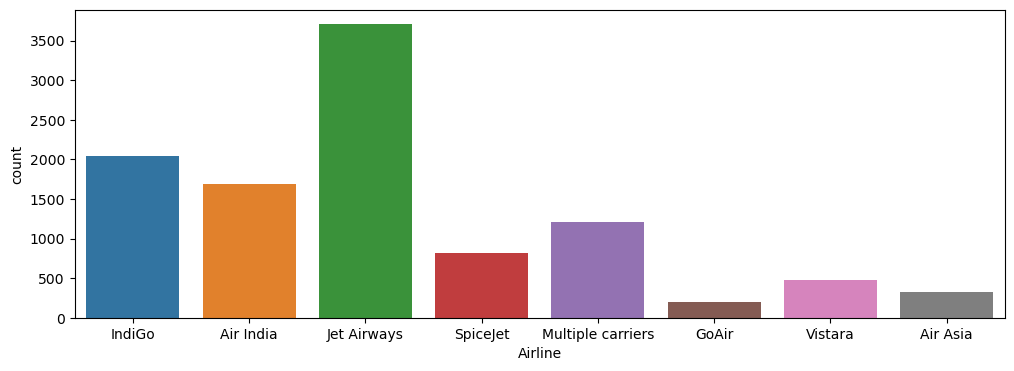

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x="Airline")

<AxesSubplot:xlabel='Source', ylabel='count'>

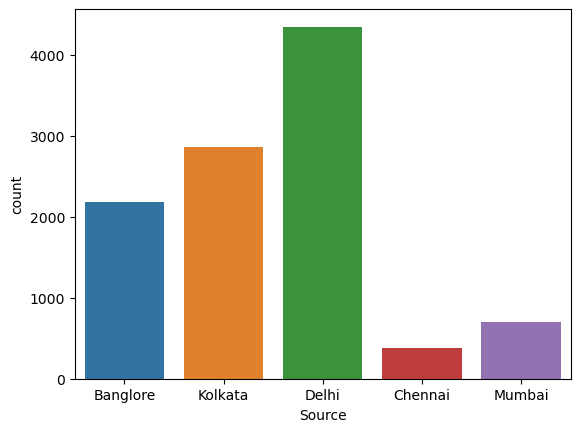

In [32]:
sns.countplot(data = df,x="Source")

<AxesSubplot:xlabel='Destination', ylabel='count'>

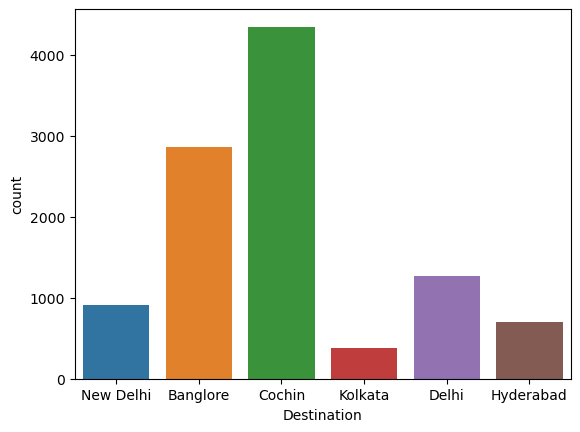

In [33]:
sns.countplot(data = df,x="Destination")

In [34]:
df.describe()

,Duration,Total_Stops,Price,Day,Month,Year
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0
mean,629.898681,0.802237,9027.109539,13.463200,4.701682,2019.0
std,500.740594,0.660653,4624.627450,8.467493,1.163687,0.0
min,5.000000,0.000000,1759.000000,1.000000,3.000000,2019.0
25%,170.000000,0.000000,5224.000000,6.000000,3.000000,2019.0
50%,505.000000,1.000000,8266.000000,12.000000,5.000000,2019.0
75%,910.000000,1.000000,12344.750000,21.000000,6.000000,2019.0
max,2860.000000,4.000000,79512.000000,27.000000,6.000000,2019.0


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

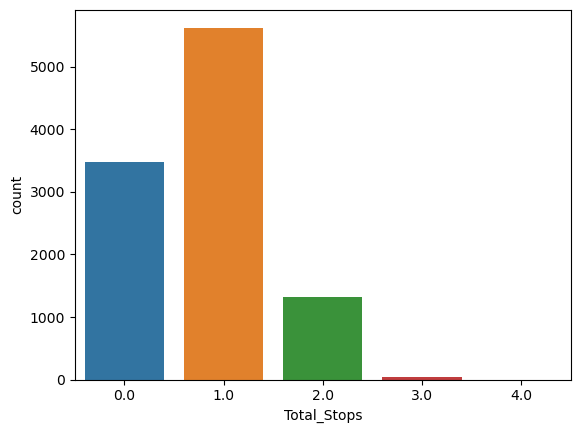

In [35]:
sns.countplot(data = df,x="Total_Stops")

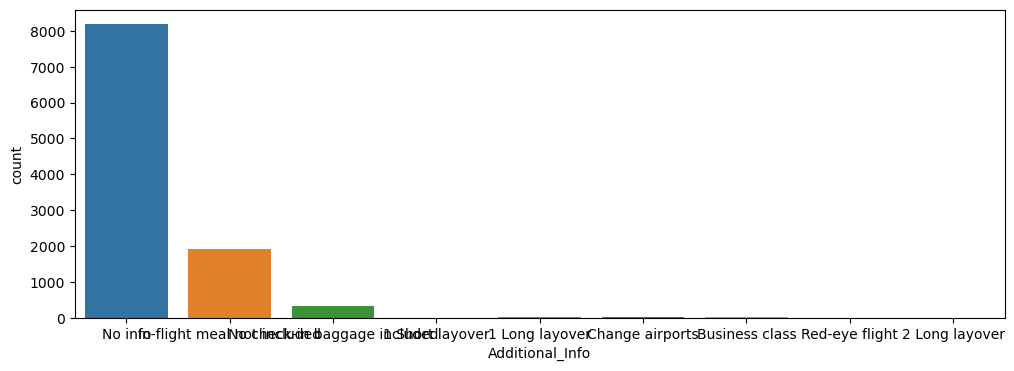

In [36]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df,x="Additional_Info")

<AxesSubplot:xlabel='Weekdays', ylabel='count'>

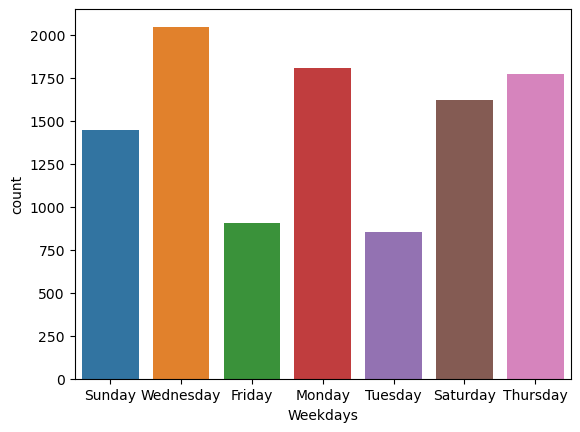

In [37]:
sns.countplot(data = df,x="Weekdays")

<AxesSubplot:xlabel='Month', ylabel='count'>

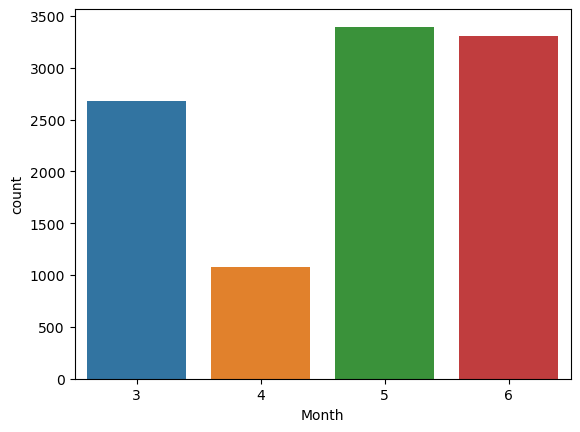

In [38]:
sns.countplot(data = df,x='Month')

<AxesSubplot:xlabel='Time_Of_The_Day', ylabel='count'>

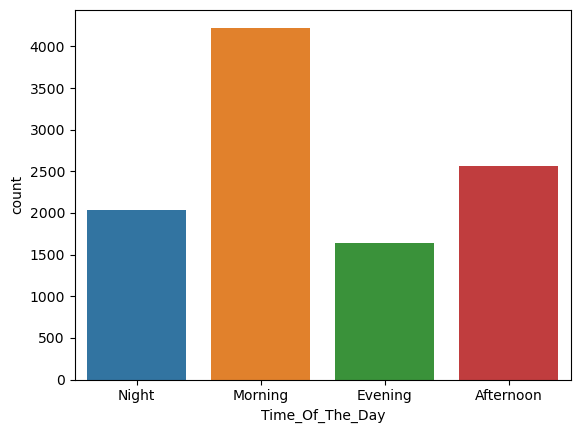

In [39]:
sns.countplot(data = df,x='Time_Of_The_Day')

<AxesSubplot:xlabel='Duration', ylabel='Count'>

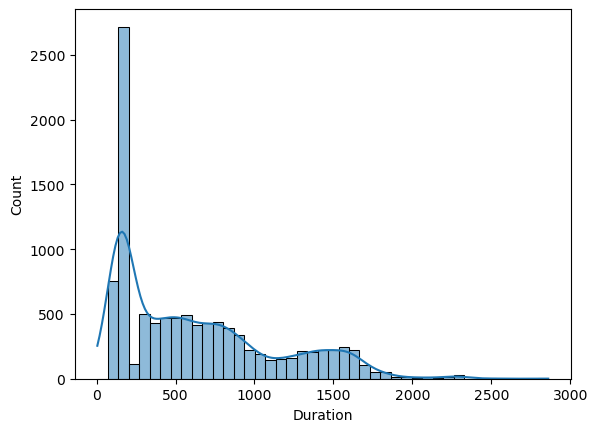

In [40]:
sns.histplot(data = df,x='Duration',kde=True)

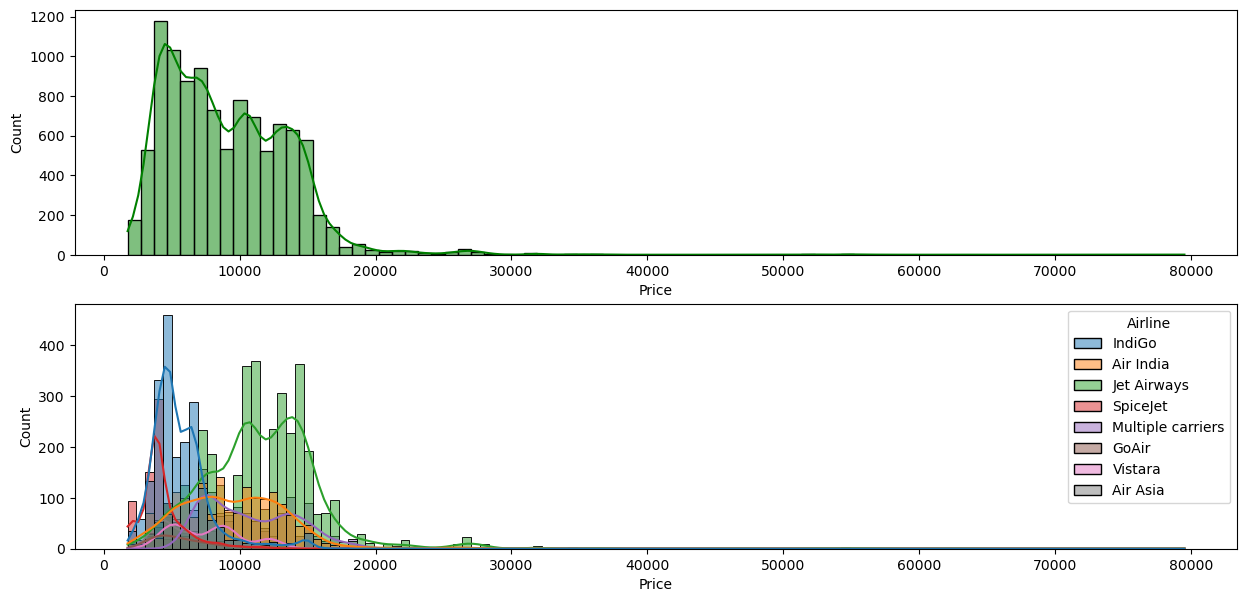

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))
plt.subplot(211)
sns.histplot(data=df,x='Price',bins=80,kde=True,color='g')
plt.subplot(212)
sns.histplot(data=df,x='Price',kde=True,hue='Airline')
plt.show()

**Observations:**

* Most of number of record has Jet Airways.
* Delhi to cochin is the most taken flight with most common route is Delhi --> Mumbai --> Cochin .
* Highest total number of stops is 1.
* Friday and Tuesday has least number of fight whereas Wednesday has highest.
* Most fights are schedule departure in the Morning.
* Median price of the flight is 8266.0 rupees and 50% of data lies between 5k to 12k which have peaks at 3k,7k and 10k whereas higest is the 80k. 

### Bivirate Analysis

In [42]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Weekdays',
       'Time_Of_The_Day'],
      dtype='object')

<AxesSubplot:xlabel='Airline', ylabel='Price'>

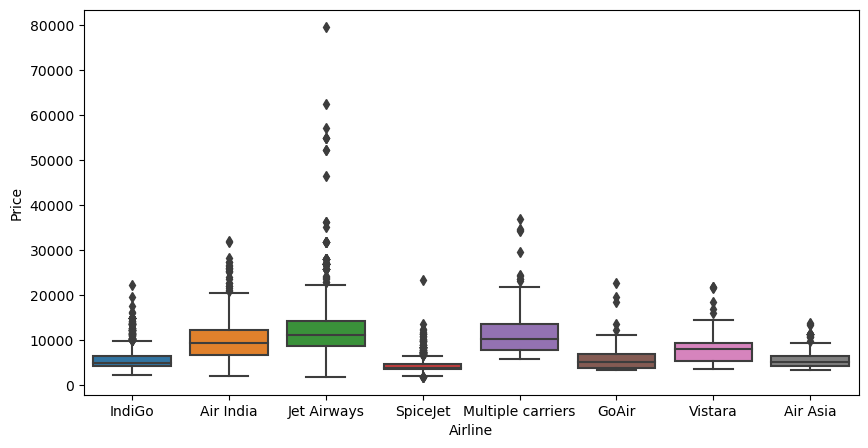

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Airline',y='Price')

In [44]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Weekdays,Time_Of_The_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No info,3897,24,3,2019,Sunday,Night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No info,7662,1,5,2019,Wednesday,Night
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → MUM → COK,09:25:00,04:25:00,1140,2.0,No info,13882,9,6,2019,Sunday,Morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No info,6218,12,5,2019,Sunday,Evening
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No info,13302,1,3,2019,Friday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,150,0.0,No info,4107,9,4,2019,Tuesday,Evening
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,155,0.0,No info,4145,27,4,2019,Saturday,Evening
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,180,0.0,No info,7229,27,4,2019,Saturday,Morning
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,160,0.0,No info,12648,1,3,2019,Friday,Morning


In [46]:
df.to_csv("data/cleaned_flight_fare.csv")